# Plotting unstructured data

In many cases the data being used is not structured enough to be described by a grid definition. This example demonstrates some earthkit tools which make it possible to effectively plot such data. Here we use some raw satellite data, which is provided as a 1-dimensional vector of points, each with a latitude and longitude value.

First we import the earthkit packages and define a Style that we will use in all the plots of this example.

In [8]:
import earthkit.data
import earthkit.plots

LEVELS = [i for i in range(390, 431, 4)]
STYLE = earthkit.plots.styles.Style(
    levels=LEVELS,
    extend="both",
    colors="Spectral_r",
)

This example use some sample test data which is a collection of satellite soundings from the IASI instrument on the METOP-C satellite from January 2021. Below we download and open the data with earthkit.

In [7]:
data = earthkit.data.from_source(
    "url",
    "https://get.ecmwf.int/repository/test-data/earthkit-plots/CO2_iasi_metop_c_nlis_2021_01.nc",
)
data_xr = data.to_xarray()
data_xr


<xarray.Dataset> Size: 11MB
Dimensions:       (sounding_dim: 381003)
Coordinates:
    latitude      (sounding_dim) float32 2MB dask.array<chunksize=(381003,), meta=np.ndarray>
    longitude     (sounding_dim) float32 2MB dask.array<chunksize=(381003,), meta=np.ndarray>
    time          (sounding_dim) datetime64[ns] 3MB dask.array<chunksize=(381003,), meta=np.ndarray>
  * sounding_dim  (sounding_dim) int64 3MB 0 1 2 3 ... 381000 381001 381002
Data variables:
    co2           (sounding_dim) float32 2MB dask.array<chunksize=(381003,), meta=np.ndarray>
Attributes: (12/36)
    title:                     NLIS
    institution:               Laboratoire de Météorologie Dynamique (LMD) - ...
    source:                    
    history:                   
    reference:                 Crevoisier et al., ACP, 2009, 2013
    tracking_id:               0ecf28e1-68ca-4e4c-8db9-3fbc1ebdfeca
    ...                        ...
    time_coverage_resolution:  P1D
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   ESA CCI Data Policy: free and open access
    platform:                  Metop-C
    sensor:                    IASI
    spatial_resolution:

The xarray reporesentation above shows how this `co2` data is stored in a single dimension, `sounding_dim`, with the `latitude`, `longitude` and `time` coordinates also stored along this dimensions.

First we will plot this data as a scatter plot, this gives a good feel for the data, however, it does not handle the overlapping points well.

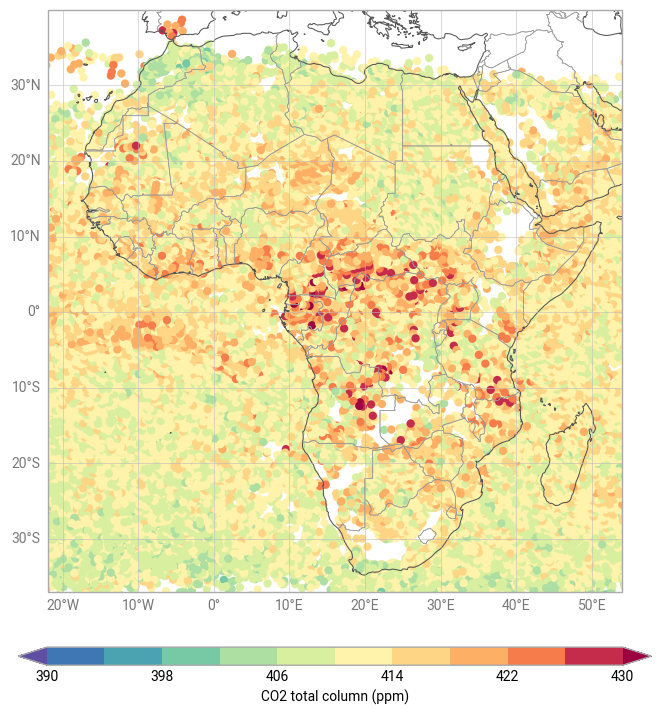

In [11]:
chart = earthkit.plots.Map(domain="Africa")

chart.scatter(
    z = data_xr.co2.values,
    x = data_xr.longitude.values,
    y = data_xr.latitude.values,
    style=STYLE,
    linewidths=0,
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.legend(label="CO2 total column (ppm)")

chart.show()

We can also contour the data, however by default earthkit-plots does not mask regions with no data, therefore there are undesirable interpolation features when we do this:

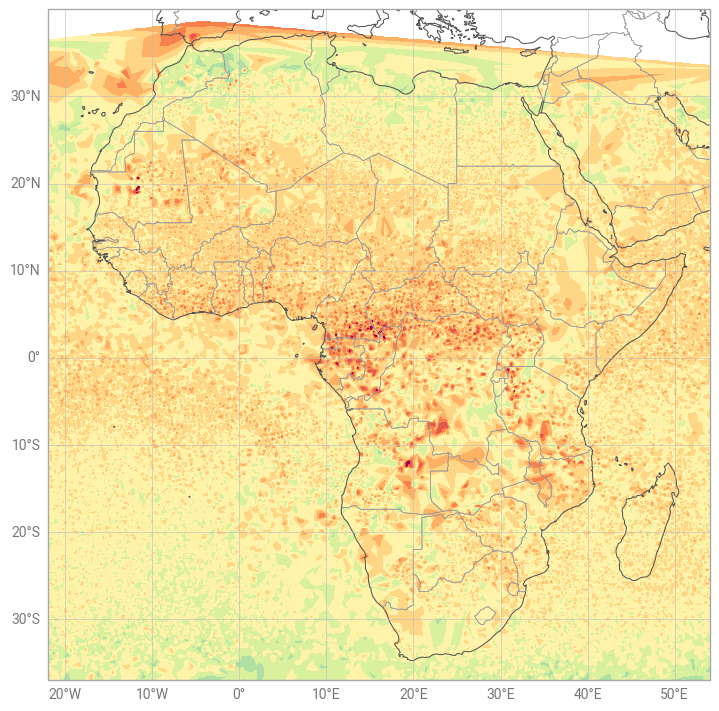

In [ ]:
chart = earthkit.plots.Map(domain="Africa")

chart.contourf(
    z = data_xr.co2.values,
    x = data_xr.longitude.values,
    y = data_xr.latitude.values,
    style=STYLE
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.legend(label="CO2 total column (ppm)")

chart.show()

To avoid this, we can use the `interpolation_distance_threshold` kwarg.

For unstructured data, a plot cell will only be plotted if there is at least one data point within the `interpolation_distance_threshold`. This can be set to `auto` , as in the code block below, and earthkit-plots will try to determine a sensible distance based on the distribution of the data provided and the resolution of the plot produced.

It can also take numeric values which represent a distance in the spatial units of the plotting projection (e.g. degrees for `PlateCarre`), or a string of the form `"N cells"`, where `N` is the number of plotting cells that are used in the interpolation.

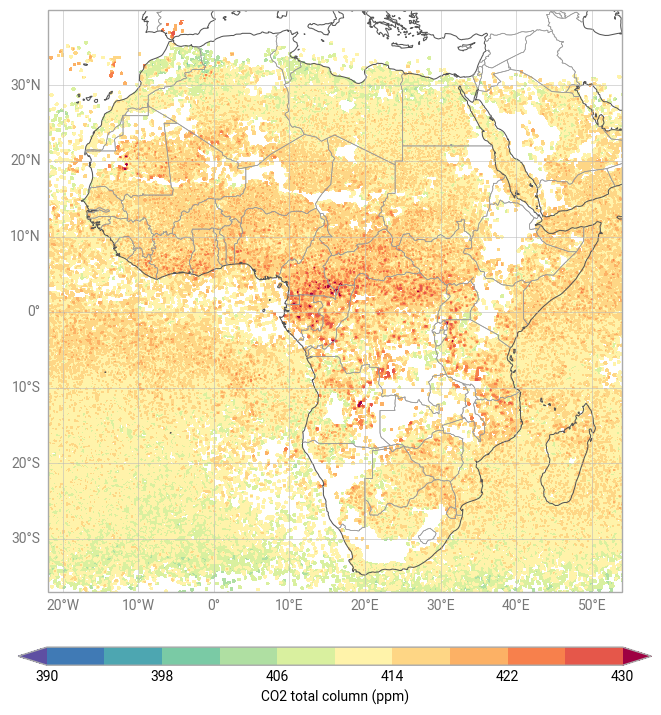

In [16]:
chart = earthkit.plots.Map(domain="Africa")

chart.contourf(
    z = data_xr.co2.values,
    x = data_xr.longitude.values,
    y = data_xr.latitude.values,
    style=STYLE,
    interpolation_distance_threshold="auto"
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.legend(label="CO2 total column (ppm)")

chart.show()